# Airbnb in Europe

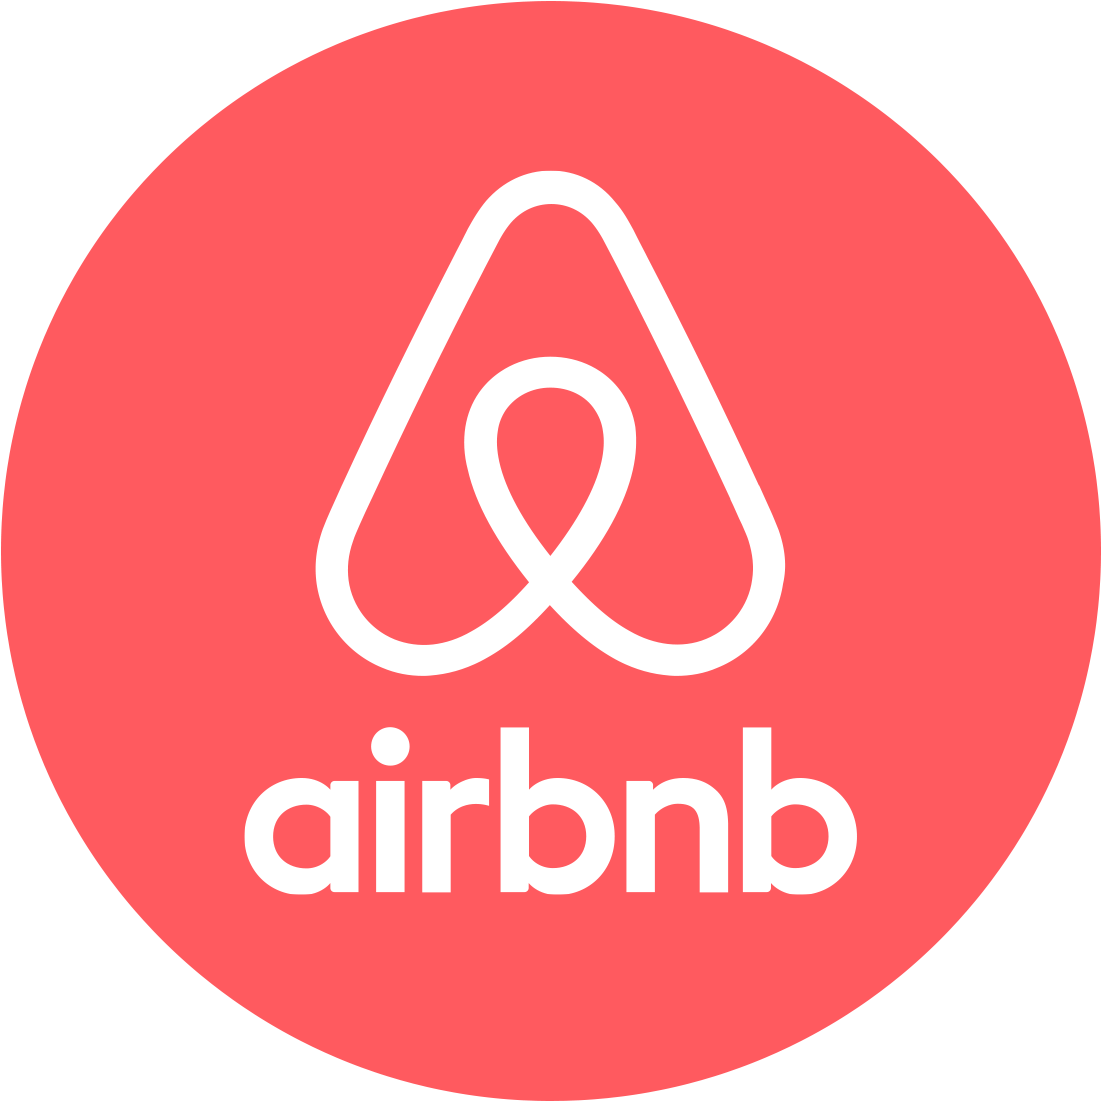

In [61]:
from IPython.display import display
from IPython.display import Image
display(Image(filename='image.png', width=400))

## What is the best rental for a group of 5 Parisian students going on a European vacation for 1 week?


# Installation librairies

In [62]:
!pip3 install pandas
!pip3 install seaborn
!pip3 install geopandas
!pip3 install geopandas
!pip3 install folium
!pip3 install plotly

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import ast
import geopandas as gpd
import seaborn as sns
import folium

import plotly
import plotly.offline as py


# Installation datasets

In [64]:
amsterdam_weekdays = pd.read_csv('amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('amsterdam_weekends.csv')
athens_weekdays = pd.read_csv('athens_weekdays.csv')
athens_weekends = pd.read_csv('athens_weekends.csv')
barcelona_weekdays = pd.read_csv('barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('barcelona_weekends.csv')
berlin_weekdays = pd.read_csv('berlin_weekdays.csv')
berlin_weekends = pd.read_csv('berlin_weekends.csv')
budapest_weekdays = pd.read_csv('budapest_weekdays.csv')
budapest_weekends = pd.read_csv('budapest_weekends.csv')
lisbon_weekdays = pd.read_csv('lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('lisbon_weekends.csv')
london_weekdays = pd.read_csv('london_weekdays.csv')
london_weekends = pd.read_csv('london_weekends.csv')
paris_weekdays = pd.read_csv('paris_weekdays.csv')
paris_weekends = pd.read_csv('paris_weekends.csv')
rome_weekdays = pd.read_csv('rome_weekdays.csv')
rome_weekends = pd.read_csv('rome_weekends.csv')
vienna_weekdays = pd.read_csv('vienna_weekdays.csv')
vienna_weekends = pd.read_csv('vienna_weekends.csv')

### 10 cities in Europe

# Vision of a dataset

In [65]:
lisbon_weekends.sample(7)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
2274,2274,137.664165,Private room,False,True,2.0,False,0,1,9.0,87.0,1,1.810806,0.364062,132.781008,4.379552,409.167444,22.996293,-9.14587,38.72794
2525,2525,303.001876,Entire home/apt,False,False,4.0,False,0,1,10.0,96.0,2,0.869442,0.272581,270.287862,8.914977,598.126966,33.616317,-9.13358,38.71861
1950,1950,153.846154,Private room,False,True,2.0,False,0,1,9.0,88.0,1,2.455675,0.107425,111.723525,3.685007,358.331642,20.139186,-9.14471,38.73414
1008,1008,135.084428,Private room,False,True,2.0,False,0,1,9.0,88.0,1,1.672760,0.189650,140.964440,4.649468,370.620659,20.829861,-9.13282,38.72647
2250,2250,269.699812,Entire home/apt,False,False,4.0,True,0,0,10.0,93.0,1,1.633760,1.080009,139.339382,4.595868,430.570593,24.199206,-9.15707,38.70689
311,311,225.609756,Entire home/apt,False,False,3.0,False,0,0,10.0,93.0,1,3.619520,2.629606,98.899252,3.262020,203.589470,11.442267,-9.18054,38.70633
1399,1399,198.874296,Private room,False,True,2.0,False,0,0,9.0,94.0,2,6.944959,0.550581,53.197819,1.754638,104.458859,5.870864,-9.19763,38.75542


# Explanation of the columns

In [66]:
lisbon_weekends.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')

realSum: the full price of accommodation for two people and two nights in EUR

room_type: the type of the accommodation 

room_shared: dummy variable for shared rooms

room_private: dummy variable for private rooms

person_capacity: the maximum number of guests 

host_is_superhost: dummy variable for superhost status

multi: dummy variable if the listing belongs to hosts with 2-4 offers

biz: dummy variable if the listing belongs to hosts with more than 4 offers

cleanliness_rating: cleanliness rating

guest_satisfaction_overall: overall rating of the listing

bedrooms: number of bedrooms (0 for studios)

dist: distance from city centre in km

metro_dist: distance from nearest metro station in km

attr_index: attraction index of the listing location

attr_index_norm: normalised attraction index (0-100)

rest_index: restaurant index of the listing location

attr_index_norm: normalised restaurant index (0-100)

lng: longitude of the listing location

lat: latitude of the listing location


# Number of rentals per city

In [67]:
dataframes = ['amsterdam_weekdays', 'amsterdam_weekends', 'athens_weekdays', 'athens_weekends', 'barcelona_weekdays', 'barcelona_weekends', 'berlin_weekdays', 'berlin_weekends', 'budapest_weekdays', 'budapest_weekends', 'lisbon_weekdays', 'lisbon_weekends', 'london_weekdays', 'london_weekends', 'paris_weekdays', 'paris_weekends', 'rome_weekdays', 'rome_weekends', 'vienna_weekdays', 'vienna_weekends']
nbr_locations = [pd.read_csv(df + '.csv')['Unnamed: 0'].count() for df in dataframes]
nbr_locations

[1103,
 977,
 2653,
 2627,
 1555,
 1278,
 1284,
 1200,
 2074,
 1948,
 2857,
 2906,
 4614,
 5379,
 3130,
 3558,
 4492,
 4535,
 1738,
 1799]

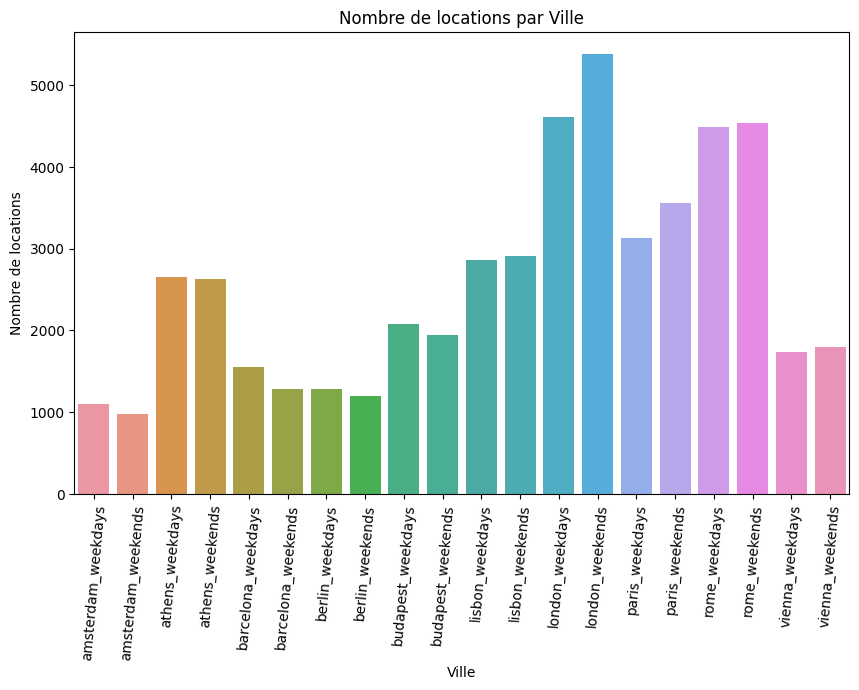

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=dataframes, y=nbr_locations)

#Title:
ax.set_title('Nombre de locations par Ville')

#Labels:
ax.set_xlabel('Ville')
ax.set_ylabel('Nombre de locations')

plt.xticks(rotation=85)

# Affichage
plt.show()

# Creation columns: wekdays or weekends & city

In [69]:
amsterdam_weekdays['city'] = 'Amsterdam'
amsterdam_weekends['city'] = 'Amsterdam'
athens_weekdays['city'] = 'Athens'
athens_weekends['city'] = 'Athens'
barcelona_weekdays['city'] = 'Barcelona'
barcelona_weekends['city'] = 'Barcelona'
berlin_weekdays['city'] = 'Berlin'
berlin_weekends['city'] = 'Berlin'
budapest_weekdays['city'] = 'Budapest'
budapest_weekends['city'] = 'Budapest'
lisbon_weekdays['city'] = 'Lisbon'
lisbon_weekends['city'] = 'Lisbon'
london_weekdays['city'] = 'London'
london_weekends['city'] = 'London'
paris_weekdays['city'] = 'Paris'
paris_weekends['city'] = 'Paris'
rome_weekdays['city'] = 'Rome'
rome_weekends['city'] = 'Rome'
vienna_weekdays['city'] = 'Vienna'
vienna_weekends['city'] = 'Vienna'

amsterdam_weekdays['week'] = 'weekday'
amsterdam_weekends['week'] = 'weekend'
athens_weekdays['week'] = 'weekday'
athens_weekends['week'] = 'weekend'
barcelona_weekdays['week'] = 'weekday'
barcelona_weekends['week'] = 'weekend'
berlin_weekdays['week'] = 'weekday'
berlin_weekends['week'] = 'weekend'
budapest_weekdays['week'] = 'weekday'
budapest_weekends['week'] = 'weekend'
lisbon_weekdays['week'] = 'weekday'
lisbon_weekends['week'] = 'weekend'
london_weekdays['week'] = 'weekday'
london_weekends['week'] = 'weekend'
paris_weekdays['week'] = 'weekday'
paris_weekends['week'] = 'weekend'
rome_weekdays['week'] = 'weekday'
rome_weekends['week'] = 'weekend'
vienna_weekdays['week'] = 'weekday'
vienna_weekends['week'] = 'weekend'


# Gathering of all dataframes

In [70]:
Europe = pd.concat([amsterdam_weekdays, amsterdam_weekends, athens_weekdays, athens_weekends,
                      barcelona_weekdays, barcelona_weekends, berlin_weekdays, berlin_weekends,
                      budapest_weekdays, budapest_weekends, lisbon_weekdays, lisbon_weekends,london_weekdays, london_weekends,
                      rome_weekdays, rome_weekends, vienna_weekdays, vienna_weekends])

In [71]:
Europe.shape

(45019, 22)

# Prices

### Creation of a new price distribution column:

In [72]:

level_p = [0, 100, 200, 300, 400, 500, np.inf] # defini les niveaux de prix et np.inf c'est les priix plus haut que 500
labels = ['<100', '100-200', '200-300', '300-400', '400-500', '500+']

# Ajout une nouvelle colonne
Europe['price_range'] = pd.cut(Europe['realSum'], bins=level_p, labels=labels)
Europe

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,week,price_range
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,weekday,100-200
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,weekday,300-400
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,weekday,200-300
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,weekday,400-500
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,weekday,400-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,1794,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,...,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Vienna,weekend,500+
1795,1795,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,...,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Vienna,weekend,300-400
1796,1796,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,...,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,Vienna,weekend,500+
1797,1797,301.054157,Private room,False,True,2.0,False,0,0,10.0,...,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Vienna,weekend,300-400


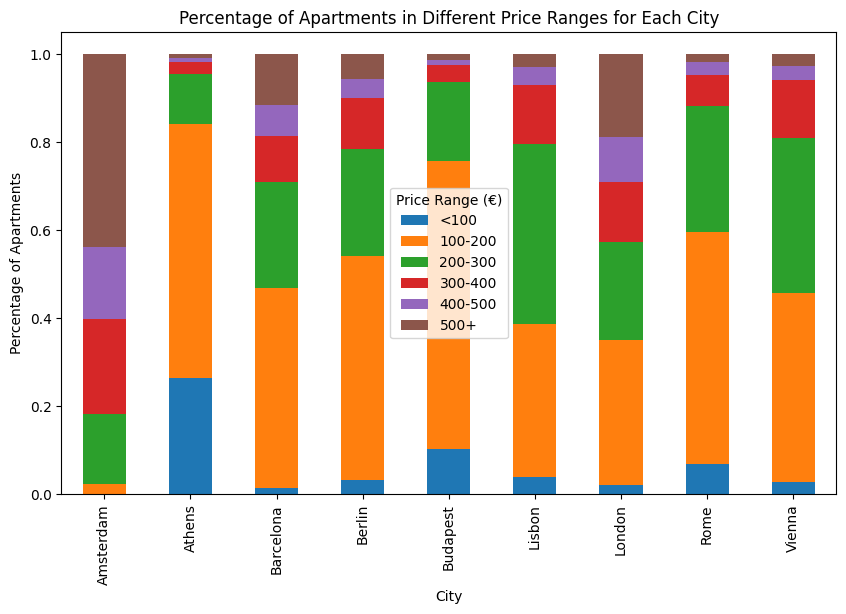

In [73]:
# Calculer le nombre d'appartements dans chaque plage de prix pour chaque ville
price_counts = Europe.groupby('city')['price_range'].value_counts(normalize=True)

# Afficher les pourcentages d'appartements dans différentes plages de prix pour chaque ville
price_counts.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))


plt.xlabel('City')
plt.ylabel('Percentage of Apartments')
plt.title('Percentage of Apartments in Different Price Ranges for Each City')


plt.legend(title='Price Range (€)')

# Afficher le plot
plt.show()

# We take Athens

In [74]:
athens = pd.concat([athens_weekdays, athens_weekends])
athens.sample(20)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,week
1789,1789,347.760879,Entire home/apt,False,False,4.0,False,0,1,10.0,...,1.002487,0.197487,293.025824,11.048291,665.363216,49.959519,23.72427,37.97757,Athens,weekday
1883,1883,145.290933,Entire home/apt,False,False,2.0,True,0,1,10.0,...,1.535140,0.549878,149.249687,5.623391,195.361952,2.917524,23.73200,37.96200,Athens,weekend
2181,2181,199.423523,Entire home/apt,False,False,3.0,False,0,1,10.0,...,1.508391,0.331448,220.123681,8.299577,239.224809,17.962455,23.72329,37.96593,Athens,weekday
1263,1263,132.167881,Entire home/apt,False,False,6.0,False,1,0,8.0,...,0.975923,0.621460,123.085084,4.640819,198.822033,14.928768,23.73828,37.98405,Athens,weekday
1756,1756,104.281396,Entire home/apt,False,False,6.0,False,0,0,4.0,...,1.876603,0.179675,103.154275,3.889345,174.478511,13.100908,23.71923,37.98661,Athens,weekday
150,150,120.450871,Entire home/apt,False,False,6.0,False,0,1,10.0,...,1.783096,0.289502,81.511897,3.073337,134.000087,10.061542,23.75552,37.97757,Athens,weekday
2180,2180,184.425749,Entire home/apt,False,False,4.0,False,0,1,10.0,...,0.421034,0.409409,350.356577,13.209899,559.248408,41.991774,23.73062,37.97522,Athens,weekday
1467,1467,127.715417,Entire home/apt,False,False,5.0,True,1,0,10.0,...,0.896566,0.781744,222.858529,8.402693,251.458841,18.881060,23.73464,37.96751,Athens,weekday
1848,1848,107.796499,Entire home/apt,False,False,2.0,True,0,0,10.0,...,1.846061,0.260765,129.686566,4.886297,167.313155,2.498645,23.72800,37.96000,Athens,weekend
489,489,130.996180,Entire home/apt,False,False,4.0,True,0,1,10.0,...,1.144723,0.231541,158.755436,5.981546,274.896903,4.105294,23.72624,37.98290,Athens,weekend


# Median price Athens

In [46]:
athens['realSum'].median()

127.71541724275303

# Price < 127€

In [47]:
athens= athens[athens['realSum'] <= 127]

In [48]:
athens

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,week
3,3,91.627024,Entire home/apt,False,False,4.0,True,1,0,10.0,...,4.367457,0.297467,39.803047,1.500740,58.706578,4.408047,23.72712,38.01435,Athens,weekday
4,4,74.051508,Private room,False,True,2.0,False,0,0,10.0,...,2.194185,0.385266,78.733405,2.968577,113.325973,8.509204,23.73391,37.99529,Athens,weekday
5,5,113.889345,Entire home/apt,False,False,6.0,True,1,0,10.0,...,2.071206,0.453867,96.588991,3.641806,158.644318,11.911981,23.71584,37.98598,Athens,weekday
6,6,106.390458,Entire home/apt,False,False,5.0,False,0,1,10.0,...,1.395424,0.438597,160.691705,6.058745,289.104123,21.707697,23.72085,37.98061,Athens,weekday
9,9,98.657231,Entire home/apt,False,False,2.0,True,1,0,10.0,...,2.740576,0.725024,62.903049,2.371706,92.611364,6.953825,23.73100,38.00000,Athens,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,2618,121.622572,Entire home/apt,False,False,4.0,False,0,0,10.0,...,2.038496,0.502134,73.659749,2.775333,106.752968,1.594242,23.75780,37.98030,Athens,weekend
2619,2619,106.624798,Entire home/apt,False,False,2.0,True,1,0,10.0,...,2.539946,0.835779,77.139580,2.906445,119.300327,1.781624,23.71200,37.98900,Athens,weekend
2620,2620,86.940220,Entire home/apt,False,False,4.0,False,0,1,10.0,...,2.581059,0.816106,59.644545,2.247272,85.196695,1.272322,23.76370,37.98175,Athens,weekend
2621,2621,69.599044,Private room,False,True,2.0,False,0,0,10.0,...,1.966514,0.866474,77.587365,2.923316,109.682351,1.637990,23.74830,37.99003,Athens,weekend


# Near the city center: (2 km)

In [49]:
# Filtrer les locations à moins de 2 km du centre-ville
athens_center = athens[athens['dist'] <= 2]
athens_center

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,week
6,6,106.390458,Entire home/apt,False,False,5.0,False,0,1,10.0,...,1.395424,0.438597,160.691705,6.058745,289.104123,21.707697,23.72085,37.98061,Athens,weekday
13,13,101.937994,Entire home/apt,False,False,4.0,False,1,0,9.0,...,1.278671,0.371223,210.513700,7.937241,241.921472,18.164936,23.73082,37.96463,Athens,weekday
14,14,78.738312,Entire home/apt,False,False,3.0,True,0,0,10.0,...,1.749961,0.824021,87.266954,3.290327,119.266383,8.955246,23.74814,37.98767,Athens,weekday
16,16,97.485529,Entire home/apt,False,False,2.0,True,1,0,10.0,...,1.920291,0.220541,100.516964,3.789907,167.633522,12.586945,23.71900,37.98700,Athens,weekday
17,17,106.390458,Entire home/apt,False,False,3.0,True,0,0,10.0,...,1.557650,0.155386,179.432635,6.765356,213.063993,15.998141,23.72711,37.96316,Athens,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,2576,81.081714,Entire home/apt,False,False,3.0,False,0,0,10.0,...,1.974965,0.348943,92.491945,3.484887,142.587483,2.129393,23.72416,37.99097,Athens,weekend
2603,2603,99.594591,Entire home/apt,False,False,3.0,False,0,0,10.0,...,1.950840,0.618145,131.464374,4.953280,182.807232,2.730032,23.71340,37.97318,Athens,weekend
2611,2611,99.594591,Entire home/apt,False,False,4.0,True,1,0,9.0,...,1.764713,0.536371,103.378589,3.895071,159.859774,2.387336,23.72540,37.98935,Athens,weekend
2614,2614,104.515736,Private room,False,True,2.0,True,1,0,10.0,...,1.529844,0.430988,139.344228,5.250175,271.311496,4.051749,23.72000,37.98200,Athens,weekend


In [50]:
athens_center.shape

(1280, 22)

In [51]:
athens_center

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,week
6,6,106.390458,Entire home/apt,False,False,5.0,False,0,1,10.0,...,1.395424,0.438597,160.691705,6.058745,289.104123,21.707697,23.72085,37.98061,Athens,weekday
13,13,101.937994,Entire home/apt,False,False,4.0,False,1,0,9.0,...,1.278671,0.371223,210.513700,7.937241,241.921472,18.164936,23.73082,37.96463,Athens,weekday
14,14,78.738312,Entire home/apt,False,False,3.0,True,0,0,10.0,...,1.749961,0.824021,87.266954,3.290327,119.266383,8.955246,23.74814,37.98767,Athens,weekday
16,16,97.485529,Entire home/apt,False,False,2.0,True,1,0,10.0,...,1.920291,0.220541,100.516964,3.789907,167.633522,12.586945,23.71900,37.98700,Athens,weekday
17,17,106.390458,Entire home/apt,False,False,3.0,True,0,0,10.0,...,1.557650,0.155386,179.432635,6.765356,213.063993,15.998141,23.72711,37.96316,Athens,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,2576,81.081714,Entire home/apt,False,False,3.0,False,0,0,10.0,...,1.974965,0.348943,92.491945,3.484887,142.587483,2.129393,23.72416,37.99097,Athens,weekend
2603,2603,99.594591,Entire home/apt,False,False,3.0,False,0,0,10.0,...,1.950840,0.618145,131.464374,4.953280,182.807232,2.730032,23.71340,37.97318,Athens,weekend
2611,2611,99.594591,Entire home/apt,False,False,4.0,True,1,0,9.0,...,1.764713,0.536371,103.378589,3.895071,159.859774,2.387336,23.72540,37.98935,Athens,weekend
2614,2614,104.515736,Private room,False,True,2.0,True,1,0,10.0,...,1.529844,0.430988,139.344228,5.250175,271.311496,4.051749,23.72000,37.98200,Athens,weekend


# Close to a subway: (500m)

In [52]:
athens_center = athens_center[athens_center['metro_dist'] <= 0.5]
athens_center.shape

(696, 22)

# Number of people (5)

In [53]:
athens_center = athens_center[athens_center['person_capacity'] == 5]
athens_center.shape

(33, 22)

# A well rated place

guest_satisfaction_overall: overall rating from guests camparing all listings offered by host

In [54]:
athens_center['guest_satisfaction_overall'].unique()

array([ 96.,  86.,  93., 100.,  92.,  97.,  95.,  98.,  91.,  94.,  89.,
        83.])

In [55]:
athens_center['guest_satisfaction_overall'].mean()

94.63636363636364

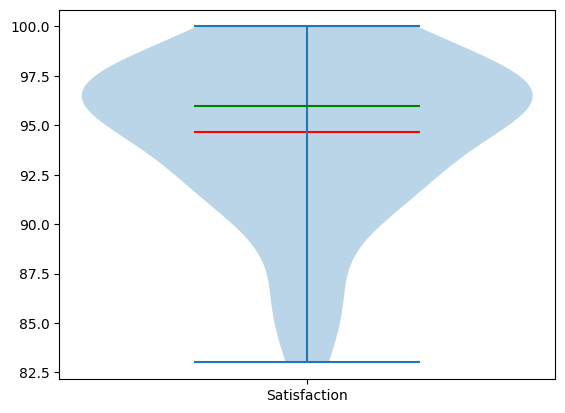

In [56]:


# WRITE YOUR CODE HERE

satisfaction= athens_center['guest_satisfaction_overall']
fig, ax = plt.subplots()
s=ax.violinplot(satisfaction, showmeans=True, showmedians=True)

s['cmeans'].set(edgecolor='red')
s['cmedians'].set(edgecolor='green')
ax.set_xticks([1], labels=['Satisfaction'])



In [57]:
athens_center = athens_center[athens_center['guest_satisfaction_overall'] >= 100]
athens_center.shape

(4, 22)

## 4 rents recommended


In [58]:

# Coordinates of downtown Athens
athens_center_lat = 37.9838
athens_center_lng = 23.7275


m = folium.Map(location=[athens_center_lat, athens_center_lng], zoom_start=14)

# Ajouter des points sur la carte pour chaque emplacement d'hébergement de athens_center_15
for index, row in athens_center.iterrows():
    folium.Marker([row['lat'], row['lng']], popup=row['room_type'], icon=folium.Icon(color="red")).add_to(m)

# Afficher la carte
m

# Conclusion :


5 people

Athens

Close to the center and the metro 

A well rated place 

For 416€

# Thank you :)

In [59]:
athens_center['realSum'].median()

119.39633960583977

In [60]:
athens_center

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,week
397,397,123.965974,Entire home/apt,False,False,5.0,False,0,0,10.0,...,1.819779,0.304368,80.312542,3.028117,123.763368,9.292907,23.75587,37.97798,Athens,weekday
941,941,115.998406,Entire home/apt,False,False,5.0,False,0,0,10.0,...,1.627793,0.190409,114.463479,4.315749,193.516439,14.530392,23.72300,37.98646,Athens,weekday
1367,1367,104.281396,Entire home/apt,False,False,5.0,True,1,0,10.0,...,1.948347,0.253595,94.753545,3.572602,136.696868,10.264033,23.72794,37.99209,Athens,weekday
1537,1537,122.794273,Entire home/apt,False,False,5.0,True,0,1,10.0,...,1.837546,0.222721,108.020988,4.072840,185.586934,13.934996,23.71853,37.98535,Athens,weekday
